# Метод сопряженных градиентов
Этот метод также можно отнести к классу градиентных методов с моментом инерции, по крайней мере для квадратичных функций. Метод сопряженных градиентов является наиболее эффективным для минимизации квадратичных функций среди рассмотренных.

<b>Определение</b>. Пусть $A$ -- симметричная матрица. Вектора $u, v$ называются <i>$A$-ортогональными</i> или <i>сопряженными</i>, если
$$
u^TAv=0.
$$
Как и ранее рассмотрим задачу минимизации
$$
f(x)=\frac{1}{2}x^TAx-b^Tx+c,
$$
где $A$ - симметричная положительно определенная матрица, таким образом $\nabla f(x)=Ax-b$, а значит нахождение точки минимума $f$ равносильно решению системы $Ax=b$. Обозначим за $x^*$ единственную точку минимума $f$.

Предположим, что нам известны $n$ попарно сопряженных направлений $d_0, \ldots, d_{n-1}$ относительно матрицы $A$. Выберем произвольную точку $x_0$ и сделаем по очереди $n$ шагов градиентного спуска по каждому из направлений, выбирая размер шага как минимум по направлению
$$
x_{k+1}=x_k-\alpha_kd_k
$$
Получаем $\alpha_k$ из уравнения $\frac{d}{d\alpha}f(x_k-\alpha d_k)=0$:
$$
\begin{array}{rl}
0&=\frac{d}{d\alpha}f(x_k-\alpha d_k)\\
&=-d_k^T(A(x_k-\alpha d_k)-b)\\
&=\alpha d^T_kAd^T_k-d_k^T(Ax_k-b)
\end{array}
$$
$$
\alpha_k=\frac{d_k^T(Ax_k-b)}{d^T_kAd_k}.
$$
Теперь предположим, что $(d_0, \ldots, d_{n-1})$ - базис в $\mathbb{R}^n$, тогда
$$
x_0-x^*=\sum_{i=0}^{n-1}\delta_id_i
$$
Умножая это равенство на $d_k^TA$ получаем
$$
d_k^TA(x_0-x^*)=\sum_{i=0}^{n-1}\delta_id_k^TAd_i=\delta_kd_k^TAd_k
$$
и получаем следующие равенства для $\delta$
$$
\begin{array}{rl}
\delta_k&=\frac{d^T_kA(x_0-x^*)}{d_k^TAd_k}\\
&=\frac{d^T_kA(x_0-x^*-\sum_{i=0}^{k-1}\alpha_id_i)}{d_k^TAd_k}=\frac{d^T_kA(x_k-x^*)}{d_k^TAd_k}=\alpha_k
\end{array}
$$

Таким образом получаем
$$
x_k-x^*=x_0-\sum_{i=0}^{k-1}\alpha_id_i-x^*=\sum_{i=0}^{n-1}\alpha_id_i-\sum_{i=0}^{k-1}\alpha_id_i=\sum_{i=k}^{n-1}\alpha_id_i,
$$
что гарантирует сходимость этой процедуры за $n$ шагов. Более того,
$$
||x_k-x^*||^2_A=(x_k-x^*)^TA(x_k-x^*)=\sum_{i=k}^{n-1}\sum_{j=k}^{n-1}\alpha_i\alpha_jd_i^TAd_j=\sum_{i=k}^{n-1}\alpha_i^2d_i^TAd_i
$$
Пусть $x\in x_0+\langle d_0, \ldots, d_{k-1}\rangle$, т. е. $x=x_0+\sum_{i=0}^{k-1}\beta_id_i$, тогда
$$
\begin{array}{rl}
||x-x^*||^2_A&=\left(\sum_{i=0}^{k-1}\beta_id_i+\sum_{i=0}^{n-1}\alpha_id_i\right)^TA\left(\sum_{i=0}^{k-1}\beta_id_i+\sum_{i=0}^{n-1}\alpha_id_i\right)\\
&=\sum_{i=0}^{k-1}(\beta_i+\alpha_i)^2d_i^TAd_i+\sum_{i=k}^{n-1}\alpha_i^2d_i^TAd_i\geq ||x_k-x^*||^2_A
\end{array}
$$
из чего следует важное свойство метода сопряженных направлений:
$$
x_k=argmin_{x\in x_0+\langle d_0, \ldots, d_{k-1}\rangle}||x-x^*||_A
$$

Остается вопрос: как найти $d_0, \ldots, d_{n-1}$? Обратим внимание на то, что сопряженность является ортогональностью для скалярного произведения $\langle x, y\rangle_A=\langle Ax, y\rangle=\langle x, Ay\rangle=x^TAy$. Из этого свойства сразу вытекает возможность построения $d$ с помощью ортогонализации Грама-Шмидта: пусть $v_1, \ldots, v_n\in \mathbb{R}^n$ - базис $\mathbb{R}^n$, тогда для вектора $d_i$, определяемые как
$$
d_k=v_k-\sum_{i=1}^{k-1}\frac{d_i^TAv_k}{d_i^TAd_i}d_i\tag{1}
$$ 
являются попарно сопряженным базисом, т. е. как раз такими векторами, которые мы использовали. Подитоживая вышеописанные рассуждения можно получить следующий алгоритм:
* Выбрать $n$ линейно независимых векторов $v_0, \ldots, v_{n-1}$.
* Построить $n$ сопряженных относительно матрицы $A$ направлений $d_0, \ldots, d_{n-1}$ по формулам
$$
d_k=v_k-\sum_{i=0}^{k-1}\frac{d_i^TAv_k}{d_i^TAd_i}d_i
$$
* Выбрать произвольную точку $x_0$ и построить последовательность
$$
x_{k+1}=x_k-\frac{d^T_k(Ax_k-b)}{d_k^TAd_k}d_k
$$

Этот алгоритм можно реализовать со сложностью $\mathcal{O}(n^3)$ с памятью $\mathcal{O}(n^2)$, для этого в формулах (1) необходимо запомнить векторы $d_i^TA$, тогда вычисление одного $d_k$ займет время порядка $\mathcal{O}(k^2)$.

<b>Определение</b>. <i>Подпространством Крылова</i> порядка $k$ матрицы $A$ и вектора $b$ называется
$$
\mathcal{K}_k(A, b)=\langle b, Ab, \ldots, A^{k-1}b\rangle, ~\mathcal{K}_0(A, b)=\{0\}. 
$$
Пусть $\chi_A(t)=\det(A-tI)=\sum_{i=0}^{n-1}\alpha_it^i-t^n$ -- характеристический полином $A$. Из теоремы Гамильтона-Кэли
$$
\chi(A)=\sum_{i=0}^{n-1}\alpha_iA^i-A^n=0
$$
Умножая на $A^{-1}b$ и учитывая $\alpha_0\neq 0$ для положительно определенной матрицы $A$ получаем
$$
A^{-1}b=\frac{1}{\alpha_0}\left(A^{n-1}b-\sum_{i=1}^{n-1}\alpha_iA^{i-1}b\right)\in\mathcal{K}_n(A, b)
$$
<b>Определение</b>. <i>Последовательностью Крылова</i> функции $f(x)=\frac{1}{2}x^TAx-b^Tx$ и начальной точкой $x_0$ называется последовательность
$$
x_k=argmin_{x\in x_0+\mathcal{K}_k(A, Ax_0-b)}f(x)
$$
Из условий оптимальности для $x_k$
$$
\nabla f(x_k)=Ax_k-b \bot \mathcal{K}_k(A, Ax_0-b)
$$
С другой стороны, раз $x_k\in x_0+\mathcal{K}_k(A, Ax_0-b)$, то очевидным образом 
$Ax_k-b\in Ax_0-b+A\mathcal{K}_{k}(A,Ax_0-b)\subset \mathcal{K}_{k+1}(A, Ax_0-b)$.

Таким образом $\nabla f(x_k)\notin \mathcal{K}_k(A,Ax_0-b)$, но $\nabla f(x_k)\in \mathcal{K}_{k+1}(A, Ax_0-b)$ $\Rightarrow$
$$
\mathcal{K}_k(A, Ax_0-b)=\langle\nabla f(x_0), \ldots, \nabla f(x_{k-1})\rangle,
$$
в силу $\nabla f(x_k)\in\mathcal{K}_k(A,Ax_0-b)^\bot$ при $i\neq j$
$$
\nabla f(x_i)^T\nabla f(x_j)=0
$$

Основная идея метода сопряженных градиентов: использование $v_k=\nabla f(x_k)$ в методе сопряженных направлений. Использую индукцию покажем, что при $v_k=\nabla f(x_k)$ метод сопряженных  направлений генерирует последоваельность Крылова для $f$, $x_0$: 

<b>База</b>. $k=0$ - тривиально.

<b>Индукционный переход</b>. Пусть метод сгенерировал последовательность Крылова вплоть до $k-1$, тогда
так как метод сопряженных направлений выбирает 
$$
x_k=argmin_{x\in x_0+\langle d_0, \ldots, d_{k-1}\rangle}||x-x^*||_A^2,
$$
учитывая 
$$
||x-x^*||_A^2=(x-x^*)^TA(x-x^*)=x^{*T}Ax^*-2x^{*T}Ax+x^TAx=||x^*||_A^2+2f(x)
$$
получаем, что минимизация $||x-x^*||_A$ равносильна минимизации $f(x)$. По построению
$$
\langle d_0, \ldots, d_{k-1}\rangle=\langle\nabla f(x_0), \ldots, \nabla f(x_{k-1})\rangle,
$$ по
индукционному предположению 
$$
\langle\nabla f(x_0), \ldots, \nabla f(x_{k-1})\rangle=\mathcal{K}_k(A, Ax_0-b).~~\#
$$

Вычисление $d_k$ сильно упрощается:
$$
v_i^T(Ax_{k+1}-b)=v_i^T(Ax_{k}-b)-\alpha_{k}v_i^TAd_{k}
$$
$$
v_i^TAd_{k}=\frac{1}{\alpha_{k}}\left(v_i^Tv_{k}-v_i^Tv_{k+1}^T\right)
$$
Так как $v_i^Tv_j=0$ при $i\neq j$, то $d_i^TAv_k$ отлично от нуля только при $i=k$ или $i=k-1$. Итого шаг $2$ имеет вид
$$
\begin{array}{rl}
d_k&=v_k-\sum_{i=0}^{k-1}\frac{d_i^TAv_k}{d_i^TAd_i}d_i=v_k+\frac{v_{k}^Tv_{k}}{\alpha_{k-1}d_{k-1}^TAd_{k-1}}d_{k-1}\\
&=v_k+\frac{v_{k}^Tv_{k}}{d_{k-1}^Tv_{k-1}}d_{k-1}
=v_k+\frac{v_{k}^Tv_{k}}{v_{k-1}^Tv_{k-1}}d_{k-1}
\end{array}
$$
Последнее неравенство верно в силу ортогональности $v_k$ и $d_i$ при $i < k$ и (1). Это соотношение позволяет вычислять $d_k$ за время порядка $\mathcal{O}(m)$, где $m$ - число ненулевых элементов $A$, что в итоге дает сложность $\mathcal{O}(nm)$ с памятью $\mathcal{O}(n+m)$. Асимптотическая скорость сходимости метода сопряженных градиентов совпадает с методом Чебышёва в силу того, что для последовательности Крылова действует схожий аргумент с многочленом:
$$
x\in x_0+\mathcal{K}_k(A, Ax_0-b)\Leftrightarrow x= x_0+\sum_{i=0}^{k-1}\phi_iA^i(Ax_0-b)
$$
Если $Ax^*=b$, то
$$
x-x^*=x_0-x^*+\sum_{i=0}^{k-1}\phi_iA^iA(x_0-x^*)=\left(I+\sum_{i=1}^{k}\phi_{i-1}A^i\right)(x_0-x^*)
$$
Таким образом выбор $x_k$ как минимум $||x-x^*||_A$ на множестве $x_0+\mathcal{K}_k(A, Ax_0-b)$ можно
описать следующим образом
$$
x_k=x^*+\min_{P(0)=1,~\deg P\leq k}\|P(A)(x_0-x^*)\|_A
$$
В частости из этого следует, что можно оценить скорость сходимости выбрав конкретный многочлен, например для многочлена Чебышёва получаем уже знакомую оценку
$$
\|x_k-x^*\|_A=\mathcal{O}\left(\left(1-\sqrt{\frac{m}{M}}\right)^k\|x_0-x^*\|_A\right)
$$

In [1]:
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
import numpy as np

def chebyshev_descent(x_0: np.ndarray,
                      A: np.ndarray,
                      b: np.ndarray,
                      m: float,
                      M: float,
                      iters: int):
    phi = (m + M) / (M - m)
    cur_gamma   = 1.0 / phi
    prev_gamma  = 0
    result = [x_0]
    cur_x = x_0
    prev_x = x_0
    for i in range(iters):
        t = cur_x
        alpha = 4 * cur_gamma / (M - m)
        beta = cur_gamma * prev_gamma
        cur_x = cur_x - alpha * (A @ cur_x - b) + beta * (cur_x - prev_x)
        prev_x = t
        t = cur_gamma
        cur_gamma = 1.0 / (2 * phi - cur_gamma)
        prev_gamma = t
        result.append(cur_x.copy())
    return result

def conjugate_gradient(A, b, x_0):
    x = x_0
    v = (A @ x - b)
    d = v
    v_norm = np.dot(v, v)
    
    result = [x.copy()]
    for i in range(len(b)):
        Ad = np.dot(A, d)
        alpha = v_norm / np.dot(d, Ad)
        x = x - alpha * d
        v = v - alpha * Ad
        v_norm_new = np.dot(v, v)

        d = v + (v_norm_new / v_norm) * d
        v_norm = v_norm_new
        result.append(x.copy())
    return result

def show_chebyshev_and_cgd():
    A = np.random.rand(5, 5)
    A = A @ A.T
    sD = sp.linalg.sqrtm(np.linalg.inv(np.diag(np.diag(A))))
    A = sD.T @ A @ sD
    b = np.random.rand(5)
    fig, axs = plt.subplots(1, 1, figsize=(10, 7))
    eig, v = np.linalg.eigh(A)
    m, M = eig[0], eig[-1]
    print('Condition(A):', M / m)
    x = np.zeros_like(b)
    
    iters = 100
    
    estimates_conjugate_gradient = conjugate_gradient(A, b, x)
    estimates_chebyshev = chebyshev_descent(x, A, b, m, M, iters)
    
    axs.plot([i for i in range(len(estimates_conjugate_gradient))], [np.linalg.norm(A @ x - b) for x in estimates_conjugate_gradient], label='CGD')
    axs.plot([i for i in range(len(estimates_chebyshev))], [np.linalg.norm(A @ x - b) for x in estimates_chebyshev], label='Chebyshev')
    axs.legend()
    axs.set_ylabel(r'$\|Ax_k-b\|$', fontsize=20)
    axs.set_xlabel(r'$k$', fontsize=20)
    axs.set_yscale('log')
    plt.close(fig)
    return fig

Condition(A): 64.15883461778647


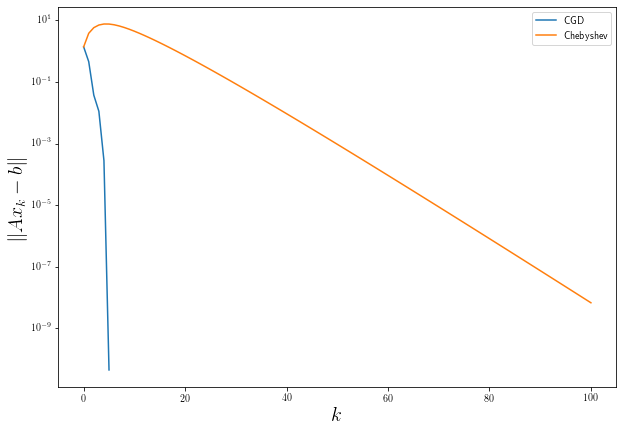

In [2]:
show_chebyshev_and_cgd()